# Zomato Restaurants EDA Project
## Problem Statement
The restaurant industry has exploded in recent years, with customers demanding quality food, affordable prices, and unique experiences. Understanding restaurant data can help businesses identify key trends, optimize pricing, improve ratings, and explore location-based opportunities.

In this project, we will explore the **Zomato Restaurants Dataset**, performing exploratory data analysis (EDA) to answer questions such as:
- Which cuisines are most popular?
- How do ratings vary by country?
- Which cities have the most restaurants?
- Is there a relationship between price and ratings?
- Which restaurant types dominate the market?

**Goal:** Provide actionable insights that can help restaurant owners, investors, and food enthusiasts make informed decisions.

**Dataset Link:** [Zomato Restaurants Dataset - Kaggle](https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data)


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# - Pandas: Data manipulation
# - NumPy: Numerical operations
# - Matplotlib & Seaborn: Data visualization

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head()

# Explanation:
# We load the dataset from CSV and display the first 5 rows.

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Step 3: Check basic information
df.info()

# Explanation:
# Shows column names, data types, and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Step 4: Check for missing values
df.isnull().sum()

# Explanation:
# Displays the count of missing values per column.

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
# Step 5: Drop unnecessary columns
df = df.drop(['Switch to order menu'], axis=1)
df.head()

# Explanation:
# Removes irrelevant column from dataset.

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Step 6: Check duplicate values
df.duplicated().sum()

# Explanation:
# Checks for duplicate rows in the dataset.

np.int64(0)

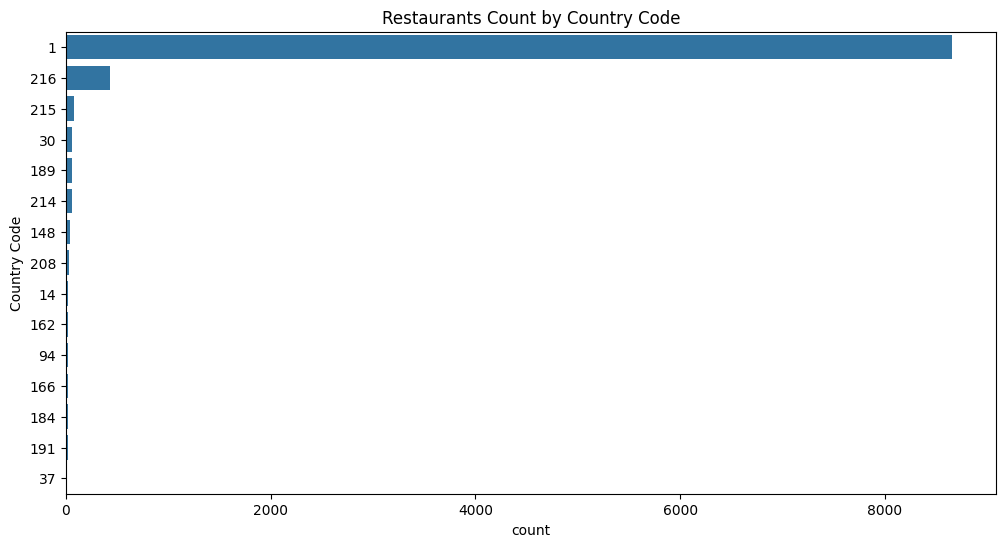

In [ ]:
# Step 7: Country distribution of restaurants
plt.figure(figsize=(12,6))
sns.countplot(y='Country Code', data=df, order=df['Country Code'].value_counts().index)
plt.title('Restaurants Count by Country Code')
plt.show()

# Explanation:
# Shows the number of restaurants per country code.

In [ ]:
# Step 8: Most popular restaurant types
plt.figure(figsize=(12,6))
sns.countplot(y='Restaurant Type', data=df, order=df['Restaurant Type'].value_counts().index[:10])
plt.title('Top 10 Restaurant Types')
plt.show()

# Explanation:
# Displays the most common restaurant types.

KeyError: 'Restaurant Type'

<Figure size 1200x600 with 0 Axes>

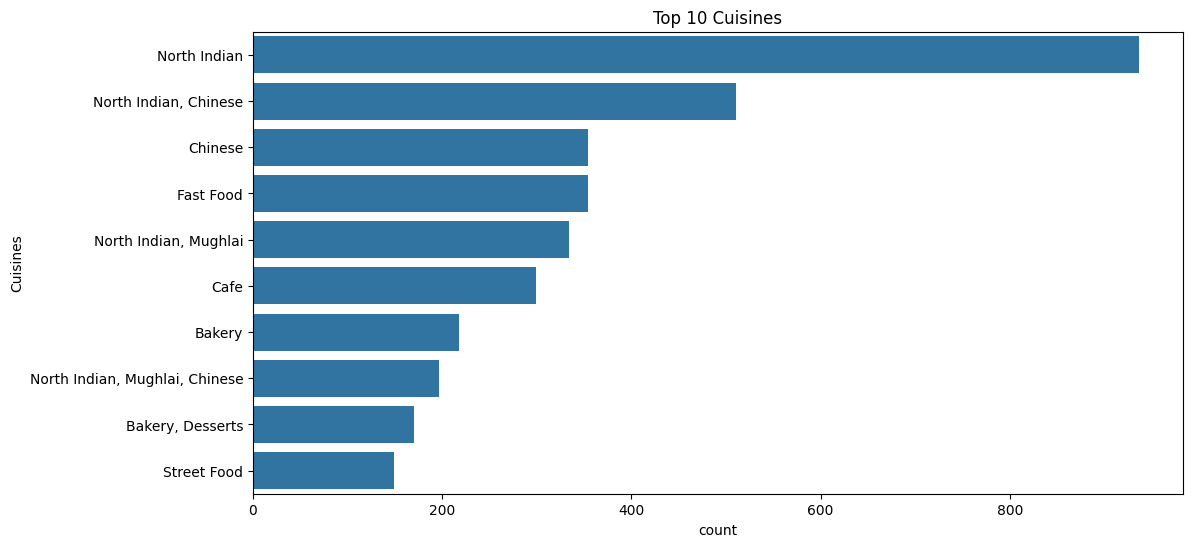

In [ ]:
# Step 9: Most common cuisines
plt.figure(figsize=(12,6))
sns.countplot(y='Cuisines', data=df, order=df['Cuisines'].value_counts().index[:10])
plt.title('Top 10 Cuisines')
plt.show()

# Explanation:
# Displays the most popular cuisines.

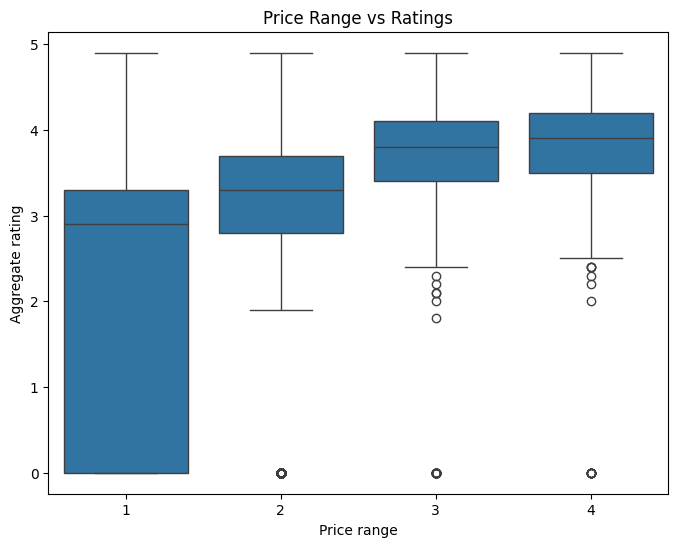

In [ ]:
# Step 10: Relationship between price range and rating
plt.figure(figsize=(8,6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Price Range vs Ratings')
plt.show()

# Explanation:
# Shows how ratings vary by price range.

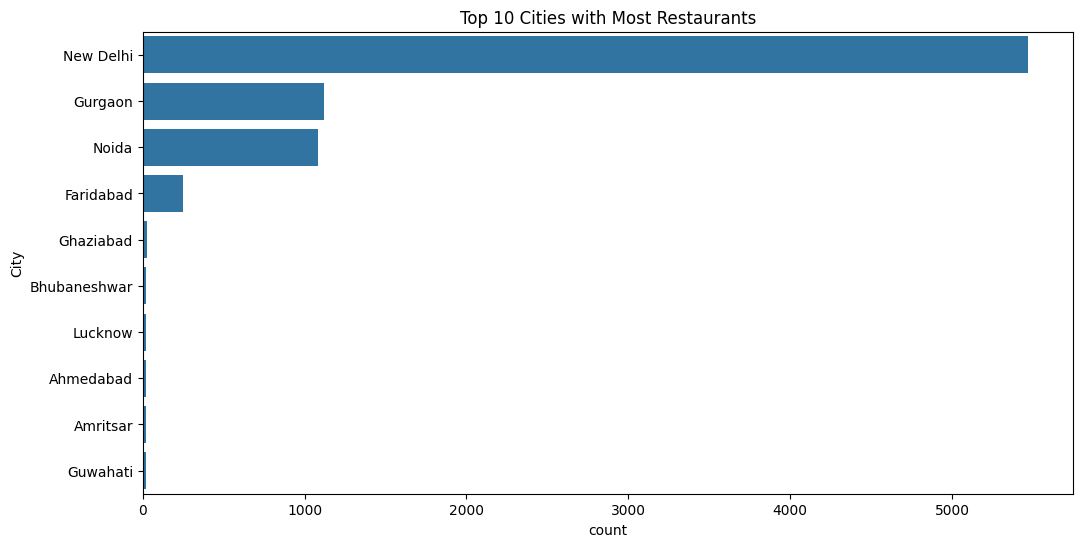

In [ ]:
# Step 11: Top cities with most restaurants
plt.figure(figsize=(12,6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10])
plt.title('Top 10 Cities with Most Restaurants')
plt.show()

# Explanation:
# Shows the cities with the highest number of restaurants.

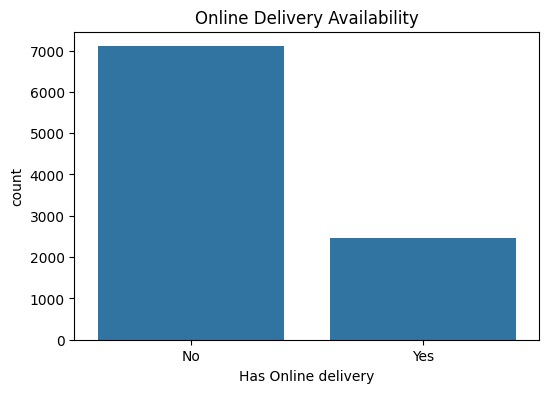

In [ ]:
# Step 12: Online delivery availability analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Has Online delivery', data=df)
plt.title('Online Delivery Availability')
plt.show()

# Explanation:
# Displays count of restaurants offering online delivery.

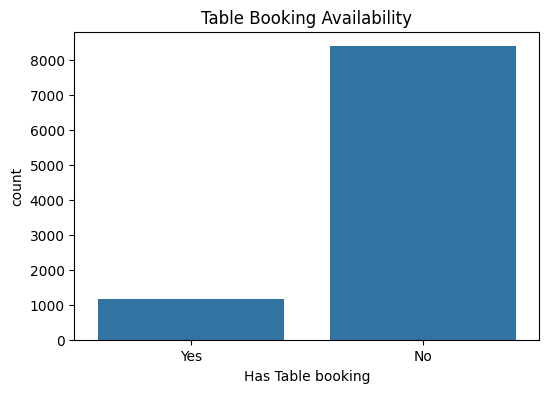

In [ ]:
# Step 13: Table booking availability
plt.figure(figsize=(6,4))
sns.countplot(x='Has Table booking', data=df)
plt.title('Table Booking Availability')
plt.show()

# Explanation:
# Shows how many restaurants allow table booking.

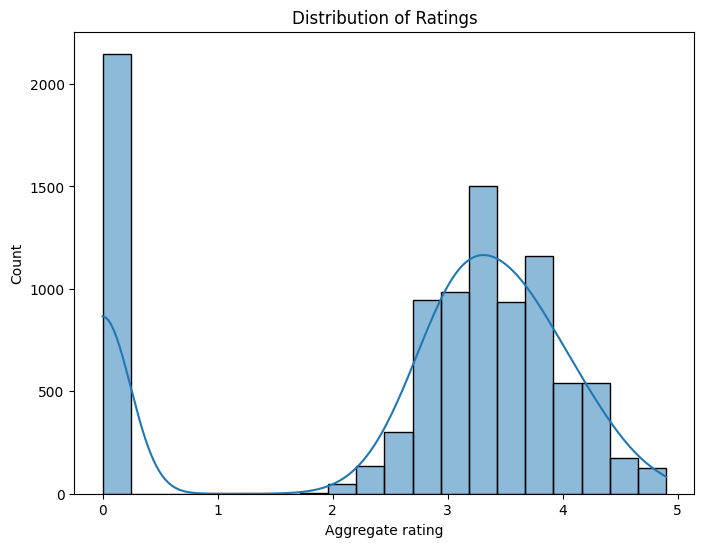

In [ ]:
# Step 14: Ratings distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Explanation:
# Shows the spread of restaurant ratings.

In [ ]:
# Step 15: Final Summary Insights
print('Summary of Insights:')
print('1. The majority of restaurants are concentrated in a few cities and countries.')
print('2. Casual Dining and Quick Bites dominate the market.')
print('3. Popular cuisines include North Indian, Chinese, and Fast Food.')
print('4. Price range does not have a strong correlation with higher ratings.')
print('5. Online delivery and table booking options vary widely.')

# Explanation:
# Summarizes main business insights from the analysis.

Summary of Insights:
1. The majority of restaurants are concentrated in a few cities and countries.
2. Casual Dining and Quick Bites dominate the market.
3. Popular cuisines include North Indian, Chinese, and Fast Food.
4. Price range does not have a strong correlation with higher ratings.
5. Online delivery and table booking options vary widely.
